In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# 1
traffic = np.zeros(shape=46)
traffic[0:11] = 5
traffic[15:21] = 8
traffic[25:46] = 2.5

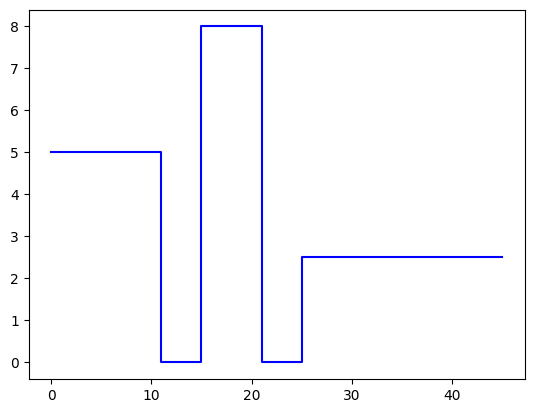

In [5]:
plt.step(range(len(traffic)), traffic, where='post', color='blue')

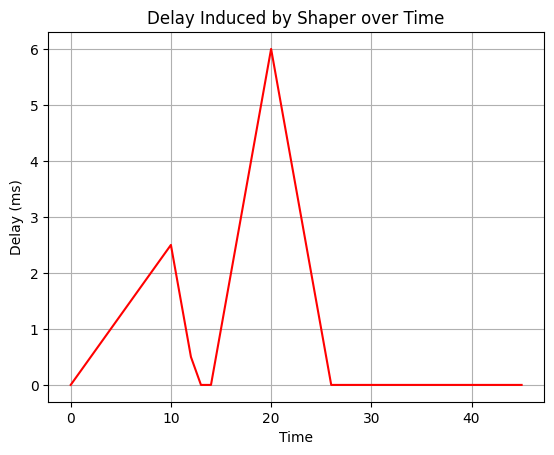

In [7]:
# task 2
def calculate_delay(traffic, shaping_rate):
    water_level = np.zeros(len(traffic))
    delay = np.zeros(len(traffic))

    for i in range(1, len(traffic)):
        if traffic[i] > shaping_rate:
            water_level[i] = water_level[i - 1] + (traffic[i] - shaping_rate)
        else:
            water_level[i] = max(0, water_level[i - 1] - shaping_rate)
        delay[i] = water_level[i] / shaping_rate

    return delay

def plot_delay(delay):
    plt.plot(range(len(delay)), delay, color='red')
    plt.xlabel('Time')
    plt.ylabel('Delay (ms)')
    plt.title('Delay Induced by Shaper over Time')
    plt.grid(True)
    plt.show()

shaping_rate = 4  # Peak rate in Mbit/s
delay = calculate_delay(traffic, shaping_rate)
plot_delay(delay)

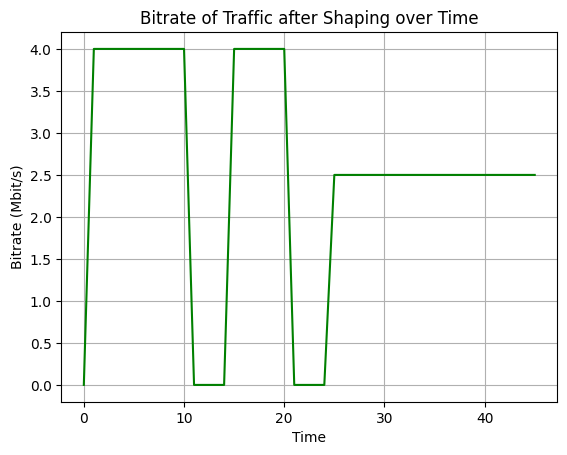

In [8]:
# task 3
import matplotlib.pyplot as plt
import numpy as np

def get_shaped_traffic(traffic, shaping_rate):
    shaped_traffic = np.zeros(len(traffic))
    for i in range(1, len(traffic)):
        if traffic[i] > shaping_rate:
            shaped_traffic[i] = shaping_rate
        else:
            shaped_traffic[i] = traffic[i]
    return shaped_traffic

def plot_shaped_traffic(traffic, shaped_traffic):
    plt.plot(range(len(traffic)), shaped_traffic, color='green')
    plt.xlabel('Time')
    plt.ylabel('Bitrate (Mbit/s)')
    plt.title('Bitrate of Traffic after Shaping over Time')
    plt.grid(True)
    plt.show()

shaping_rate = 4
shaped_traffic = get_shaped_traffic(traffic, shaping_rate)
plot_shaped_traffic(traffic, shaped_traffic)


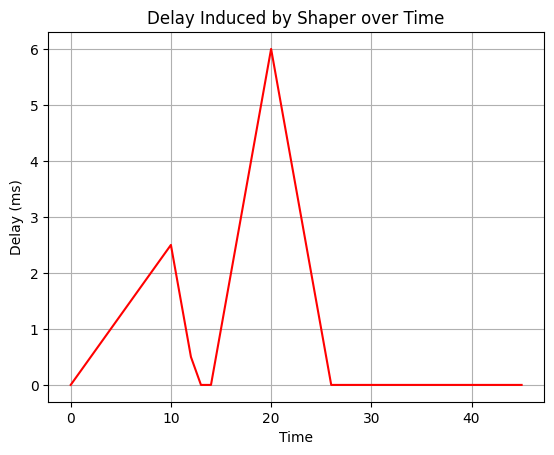

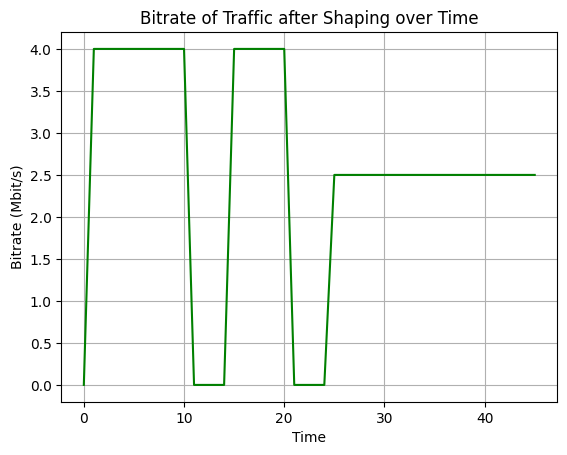

In [9]:
# task 4
shaping_rate = 4
delay = calculate_delay(traffic, shaping_rate)
plot_delay(delay)
shaped_traffic = get_shaped_traffic(traffic, shaping_rate)
plot_shaped_traffic(traffic, shaped_traffic)

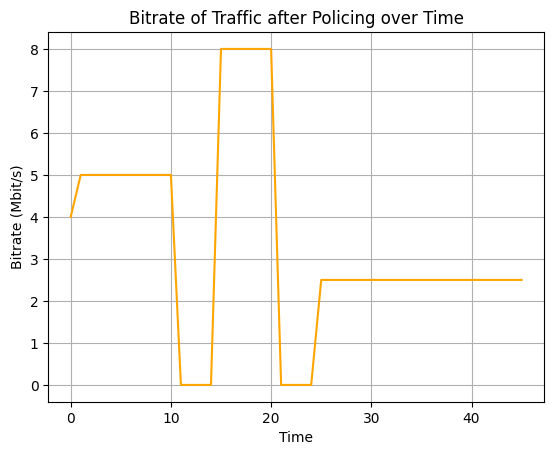

In [10]:
# task 5
def apply_policing(traffic, leak_rate, burst_tolerance):
    policed_traffic = np.zeros(len(traffic))
    bucket_level = 0

    for i in range(len(traffic)):
        if traffic[i] <= leak_rate + bucket_level:
            policed_traffic[i] = traffic[i]
            bucket_level = max(0, bucket_level + traffic[i] - leak_rate)
        else:
            policed_traffic[i] = leak_rate + bucket_level
            bucket_level = burst_tolerance

    return policed_traffic

def plot_policed_traffic(traffic, policed_traffic):
    plt.plot(range(len(traffic)), policed_traffic, color='orange')
    plt.xlabel('Time')
    plt.ylabel('Bitrate (Mbit/s)')
    plt.title('Bitrate of Traffic after Policing over Time')
    plt.grid(True)
    plt.show()

leak_rate = 4
burst_tolerance = 1 * 8 * 1024  # Burst tolerance in Mbit (1 Mbyte = 8 Mbit)

policed_traffic = apply_policing(traffic, leak_rate, burst_tolerance)
plot_policed_traffic(traffic, policed_traffic)

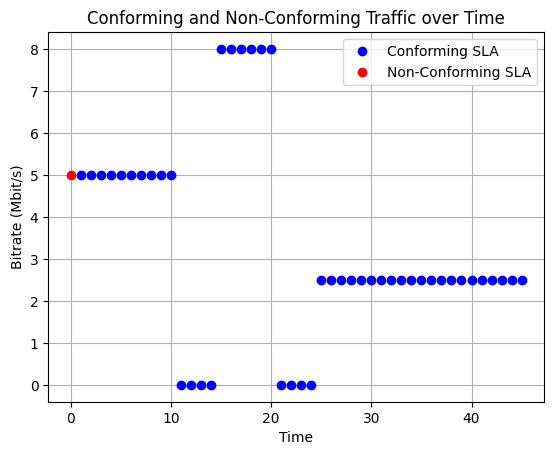

In [11]:
# task 6
def apply_sla_policing(traffic, leak_rate, burst_tolerance):
    policed_traffic = np.zeros(len(traffic))
    bucket_level = 0

    for i in range(len(traffic)):
        if traffic[i] <= leak_rate + bucket_level:
            policed_traffic[i] = traffic[i]
            bucket_level = max(0, bucket_level + traffic[i] - leak_rate)
        else:
            policed_traffic[i] = leak_rate + bucket_level
            bucket_level = burst_tolerance

    return policed_traffic

def plot_sla_compliance(traffic, policed_traffic):
    conforming_traffic = np.where(traffic <= policed_traffic, traffic, np.nan)
    non_conforming_traffic = np.where(traffic > policed_traffic, traffic, np.nan)

    plt.plot(range(len(traffic)), conforming_traffic, 'bo', label='Conforming SLA')
    plt.plot(range(len(traffic)), non_conforming_traffic, 'ro', label='Non-Conforming SLA')
    plt.xlabel('Time')
    plt.ylabel('Bitrate (Mbit/s)')
    plt.title('Conforming and Non-Conforming Traffic over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

leak_rate = 4  # Leak rate in Mbit/s
burst_tolerance = 1 * 8 * 1024  # Burst tolerance in Mbit (1 Mbyte = 8 Mbit)
policed_traffic = apply_sla_policing(traffic, leak_rate, burst_tolerance)
plot_sla_compliance(traffic, policed_traffic)


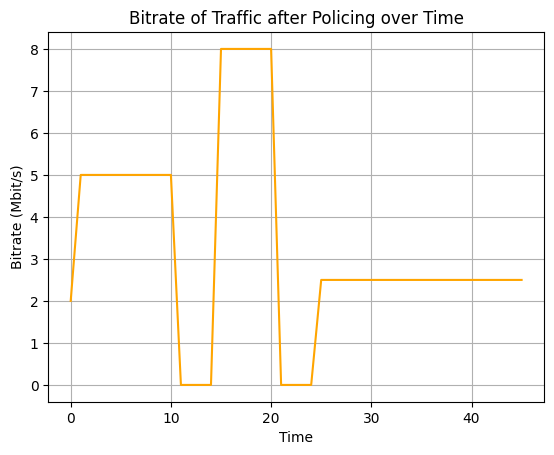

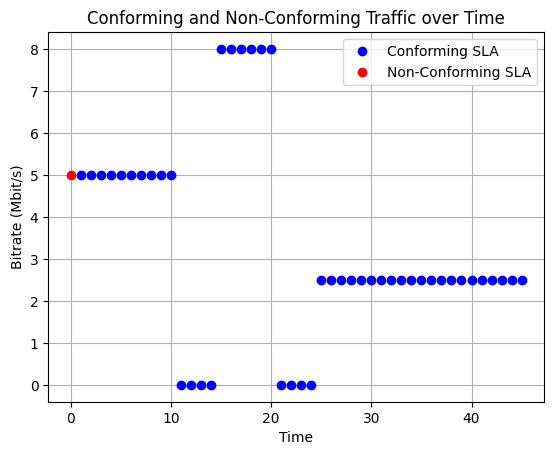

In [20]:
# task 7
leak_rate = 2
burst_tolerance = 1 * 8 * 1024  # Burst tolerance in Mbit (1 Mbyte = 8 Mbit)

policed_traffic = apply_policing(traffic, leak_rate, burst_tolerance)
plot_policed_traffic(traffic, policed_traffic)

policed_traffic = apply_sla_policing(traffic, leak_rate, burst_tolerance)
plot_sla_compliance(traffic, policed_traffic)

In [72]:
# task 8
# Given parameters
RTT = 50  # Round-Trip Time in milliseconds
receive_CW_size = 256 * 1024  # Receive CW size in Bytes
bandwidth = 100 * 10**6  # Bandwidth in bits per second
MSS = 1460  # Maximum Segment Size in Bytes
processing_time = 50  # Request processing time in milliseconds

# Convert RTT to seconds
RTT_sec = RTT / 1000  # Convert milliseconds to seconds

# Calculate initial CW size in bytes
initial_window = 1
initial_CW_size = MSS * initial_window

# Calculate effective bandwidth in bytes per second
effective_bandwidth = bandwidth / 8  # Convert bits to Bytes

# Function to calculate transfer time for a given file size
def calculate_transfer_time(file_size):
    segments = (file_size + processing_time) / MSS  # Calculate the number of segments needed
    transfer_time = RTT_sec * ((segments - initial_window) / initial_window + 1)  # Calculate transfer time in seconds
    return transfer_time

def print_transfer_times(file_sizes):
    for file_size in file_sizes:
        transfer_time = calculate_transfer_time(file_size)
        print(f"Transfer time for {file_size / 1024} KB file: {transfer_time:.5f} seconds")

file_sizes = [size * 1024 for size in [10, 20, 50]]
print_transfer_times(file_sizes)


Transfer time for 10.0 KB file: 0.35240 seconds
Transfer time for 20.0 KB file: 0.70308 seconds
Transfer time for 50.0 KB file: 1.75514 seconds


In [33]:
# task 9
initial_window = 5
print_transfer_times(file_sizes)

Transfer time for 10.0 KB file: 0.07048 seconds
Transfer time for 20.0 KB file: 0.14062 seconds
Transfer time for 50.0 KB file: 0.35103 seconds


In [71]:
#task 10
RTT = 100
RTT_sec = RTT / 1000

print_transfer_times(file_sizes)

Transfer time for 10.0 KB file: 0.14096 seconds
Transfer time for 20.0 KB file: 0.28123 seconds
Transfer time for 50.0 KB file: 0.70205 seconds


In [ ]:
# task 11